In [28]:
using LinearAlgebra
using Distributions
using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [29]:
using DataFrames
using StatsPlots

In [30]:
using Revise
using Newtrinos
using Newtrinos.osc

In [31]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.6
  [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [32]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NNM(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )


OscillationConfig{NNM, SI, Basic, Newtrinos.osc.All}(NNM(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All())

In [33]:
osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NNM, SI, Basic, Newtrinos.osc.All}(NNM(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, m₀ = 0.01, N = 20.0, r = 1.0), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), m₀ = Uniform{Float64}(a=0.001, b=1.0), N = Uniform{Float64}(a=1.0, b=90.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#90"(), Newtrinos.osc.var"#osc_prob#38"{Newtrinos.osc.var"#osc_prob#36#39"{OscillationConfig{NNM, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#36#39"{OscillationConfig{NNM, SI, Basic, Newtrinos.osc.All}}(OscillationC

In [34]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics = (; osc, atm_flux, earth_layers);

In [35]:
experiments = (
 
    dayabay = Newtrinos.dayabay.configure(physics),
);

[ Info: Loading dayabay data


In [36]:
p = Newtrinos.get_params(experiments)

(N = 20.0, m₀ = 0.01, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

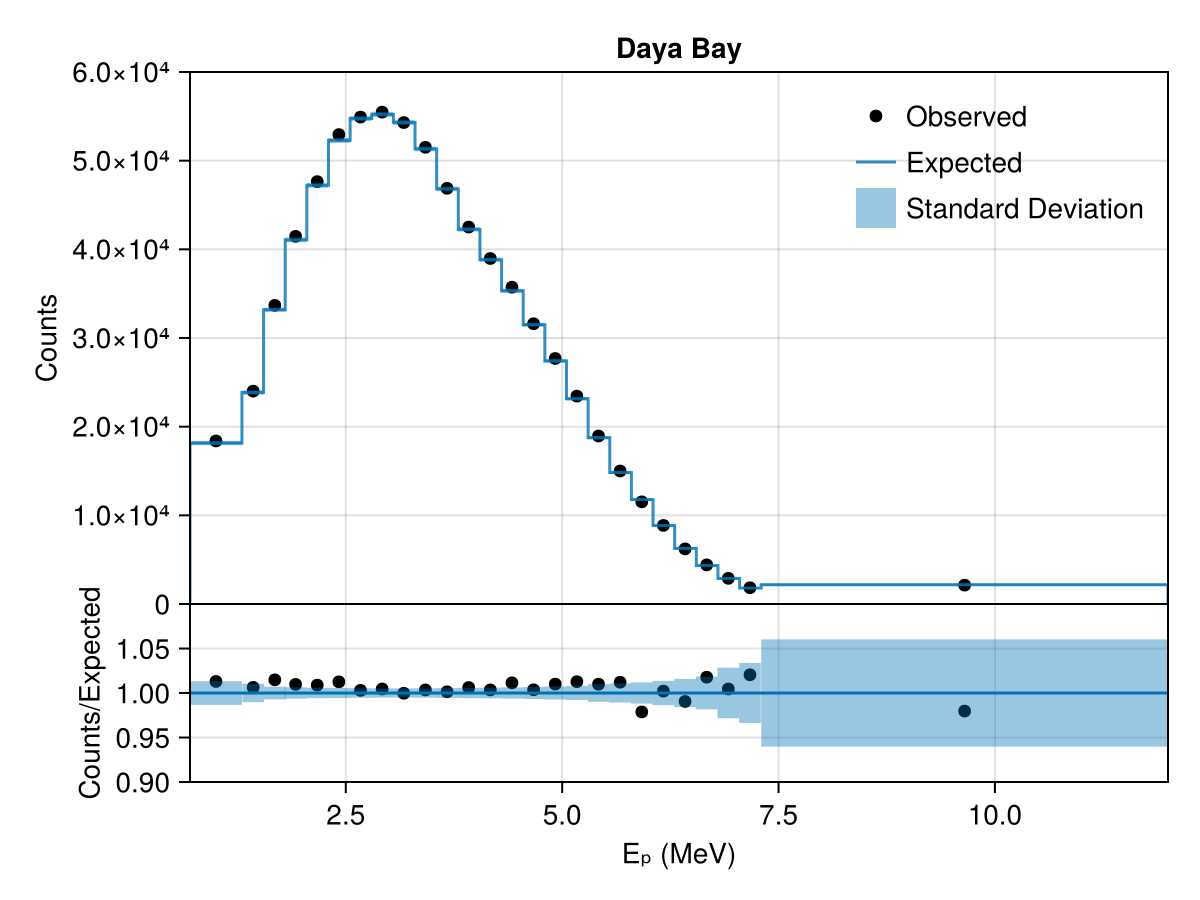

In [37]:
img = experiments.dayabay.plot(p)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural_plot/dayabay_data_NNM_20.png", img)

In [38]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = ( θ₁₃ =31, Δm²₃₁=31)  

modified_priors = (
    N = all_priors.N, 
    m₀= p.m₀,
    r = p.r,
    
   
  

    Δm²₂₁ = p.Δm²₂₁,  
    Δm²₃₁ = all_priors.Δm²₃₁ , 
    δCP = p.δCP,    
    θ₁₂ = p.θ₁₂,    
    θ₁₃= all_priors.θ₁₃,       
    θ₂₃ = p.θ₂₃   
    

)

likelihood = Newtrinos.generate_likelihood(experiments);
result = Newtrinos.profile(likelihood, modified_priors, vars_to_scan, p)

[ Info: Setting new default BAT context BATContext{Float64}(Random123.Philox4x{UInt64, 10}(0xd8e5e390899d43a0, 0x42cfbfa56f2ea05d, 0x322cb0c7d276755c, 0x2025ff5a453dd09c, 0xdb129234280d6030, 0xb542998656df58e3, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0x0000000000000000, 0), HeterogeneousComputing.CPUnit(), BAT._NoADSelected())
Progress: 100%|█████████████████████████████████████████| Time: 0:26:18


NewtrinosResult((θ₁₃ = [0.1, 0.10333333333333333, 0.10666666666666667, 0.11000000000000001, 0.11333333333333334, 0.11666666666666667, 0.12000000000000001, 0.12333333333333334, 0.12666666666666668, 0.13  …  0.16999999999999998, 0.17333333333333334, 0.1766666666666667, 0.18000000000000002, 0.18333333333333335, 0.18666666666666668, 0.19, 0.19333333333333336, 0.19666666666666668, 0.2], Δm²₃₁ = [0.002, 0.002033333333333333, 0.0020666666666666667, 0.0021, 0.0021333333333333334, 0.0021666666666666666, 0.0022, 0.0022333333333333333, 0.002266666666666667, 0.0023  …  0.0027, 0.0027333333333333333, 0.002766666666666667, 0.0028, 0.0028333333333333335, 0.0028666666666666667, 0.0029000000000000002, 0.0029333333333333334, 0.002966666666666667, 0.003]), (N = [19.999999999999993 19.999999999999993 … 19.999999999999993 19.999999999999993; 19.999999999999993 19.999999999999993 … 19.999999999999993 19.999999999999993; … ; 19.999999999999993 19.999999999999993 … 19.999999999999993 19.999999999999993; 19.99

In [39]:
#likelihood = Newtrinos.generate_likelihood(experiments);
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (θ₁₃=31, Δm²₃₁=31), p)
#result = Newtrinos.profile(likelihood,  Newtrinos.get_priors(experiments), (r=31, m₀=31), p; gradient_map=false)

In [40]:
JLD2.@save "scan_dayabay_thetadeltam_NNM_profN.jld2" result

In [41]:
using CairoMakie

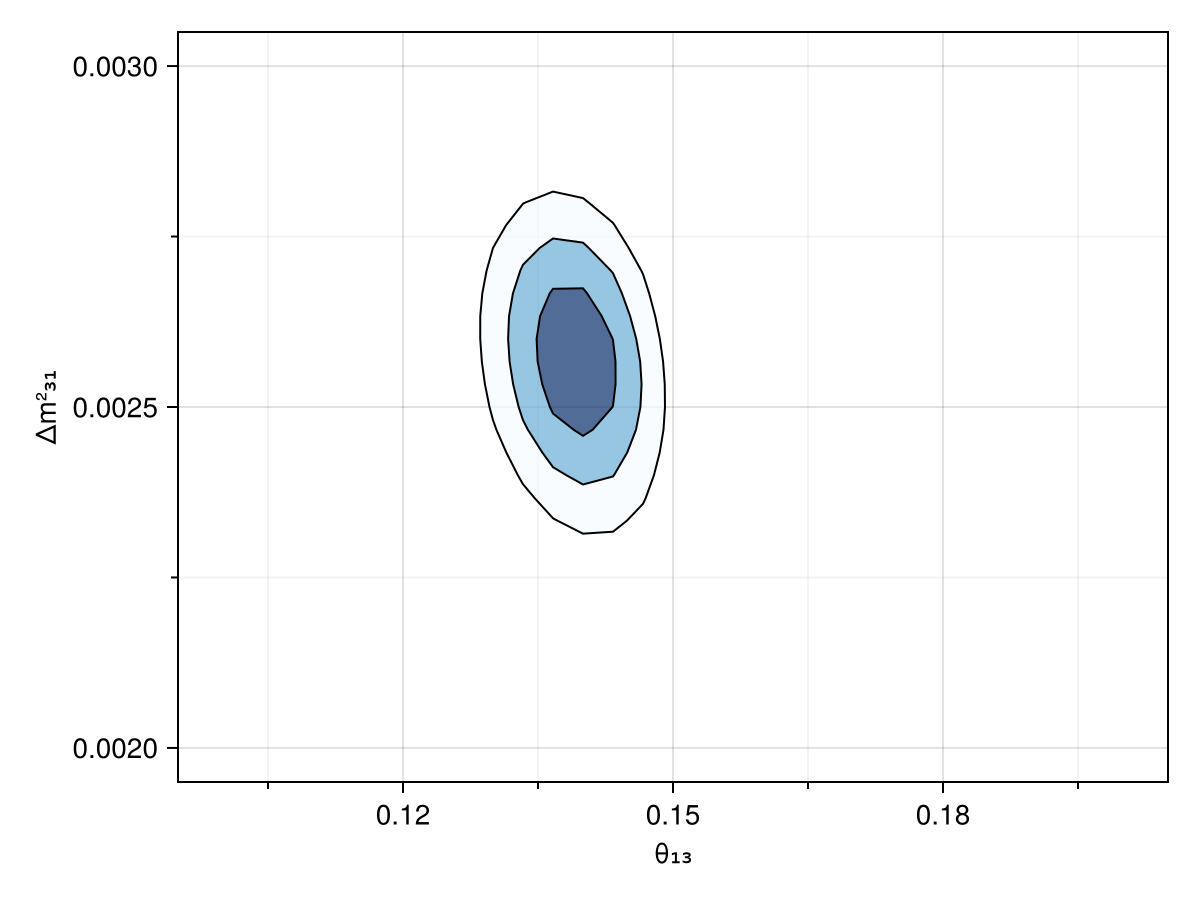

In [42]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural_plot/dayabay_thetadeltam_NNM_profN.png", img)


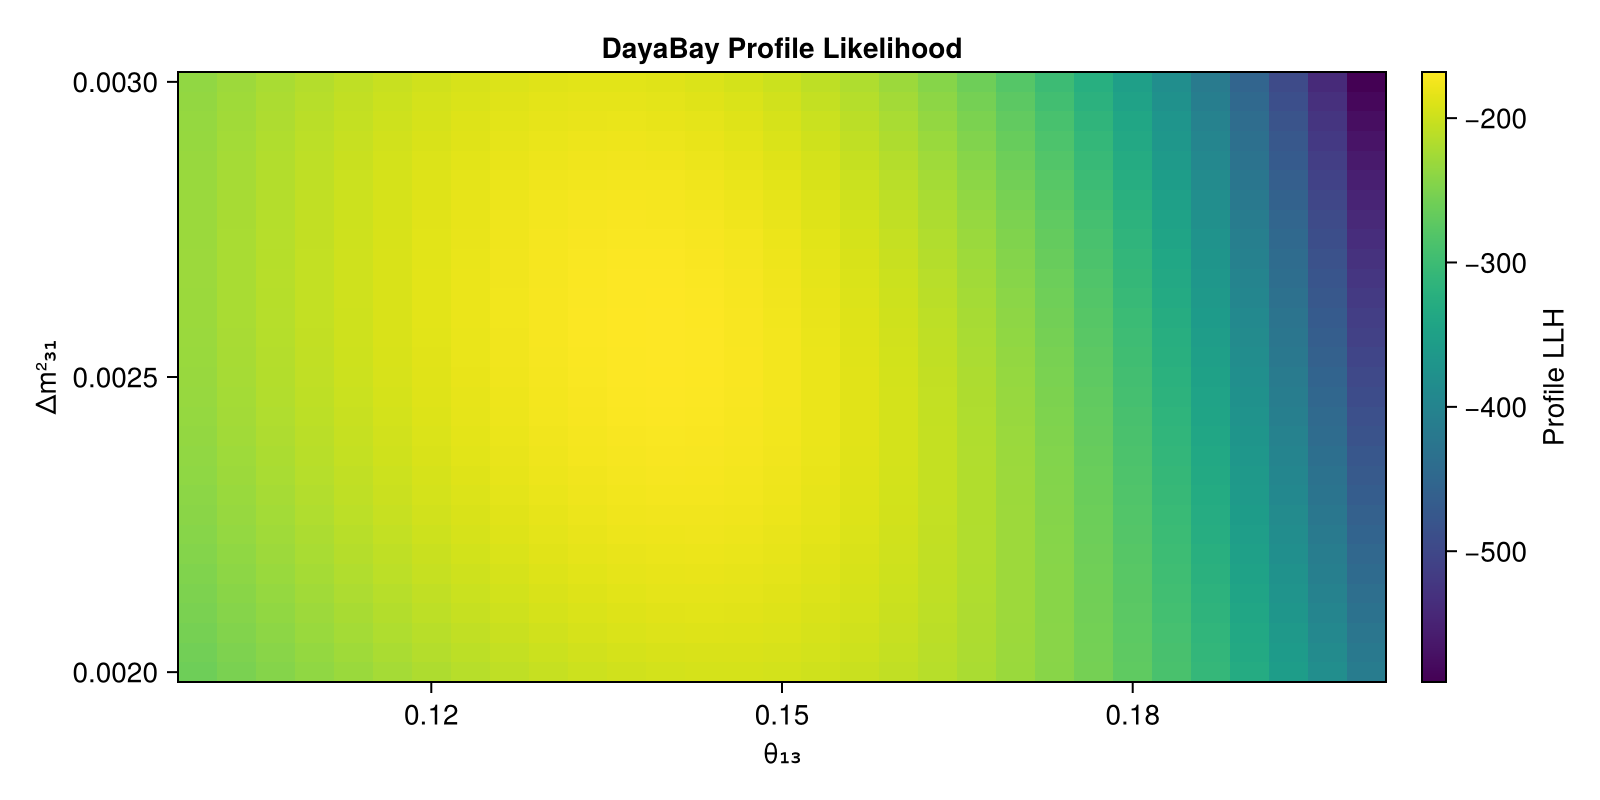

In [43]:
llh_data = Float64.(result.values.llh)


fig = Figure(size=(800, 400))

ax = Axis(fig[1,1], 
    xlabel=String(keys(result.axes)[1]), 
    ylabel=String(keys(result.axes)[2]), 
    title="DayaBay Profile Likelihood"
)

hm = CairoMakie.heatmap!(ax, result.axes[1], result.axes[2], result.values.llh)
Colorbar(fig[1,2], hm, label="Profile LLH")

save("/home/sofialon/Newtrinos.jl/natural_plot/dayabay_thetadeltam_NNM_profN.png", fig)
fig

Likelihood ratio test


In [44]:
JLD2.@load "scan_dayabay_thetadeltam_SM.jld2" result
ll_0 = result.values.llh

JLD2.@load "scan_dayabay_thetadeltam_NND_profN.jld2" result
ll_1 = result.values.llh

pvalue =Newtrinos.likelihood_ratio_test(ll_0,ll_1, 2)

ll_0: Any[-302.4716069851248 -299.3814874105783 -296.4203722706933 -293.59234495586077 -290.9012228039638 -288.35056712385074 -285.94369439814386 -283.68368793802586 -281.57340928265756 -279.61550867771734 -277.81243402826044 -276.16643779754367 -274.67958141218804 -273.35373683184406 -272.1905850449926 -271.19161135872866 -270.35809745648305 -269.69111030125646 -269.19148806087566 -268.8598233242585 -268.6964439622668 -268.70139206213855 -268.8744014299001 -269.21487420974427 -269.7218572126701 -270.39401857825914 -271.22962541301723 -272.22652305612775 -273.38211661851614 -274.6933554238578 -276.1567209506018; -292.6154096192527 -289.4012557669376 -286.3225331994417 -283.38344656945026 -280.58792640021977 -277.93964176186483 -275.4420141000042 -273.09823138122744 -270.9112617484946 -268.88386593278574 -267.0186077414477 -265.3178620348856 -263.78381970757397 -262.4184893028572 -261.22369500996587 -260.2010709126542 -259.35205147876366 -258.67785839617017 -258.1794839707194 -257.85767

1.0

Oscillations


In [95]:
osc_prob = Newtrinos.osc.get_osc_prob(osc_cfg)

osc_cfg_NND = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc_prob_NND = Newtrinos.osc.configure(osc_cfg_NND)

E_range = range(0.002, 0.01, length=1000) 
L=1.663
L_vec = [L]

p= Newtrinos.get_params(experiments)
probab = osc_prob(collect(E_range), L_vec, p; anti=true)
probab_NND= osc_prob_NND(collect(E_range), L_vec, p; anti=true)

# Create figure and axis
fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Neutrino Oscillation Probabilities (L = $(L) km)"
)

# Plot the lines

lines!(ax, E_range, probab[:, 1, 1, 1], label="P(νₑ → νₑ) SM", linewidth=2, color=:blue)
lines!(ax, E_range, probab_NND[:, 1, 1, 1], label="P(νₑ → νₑ) NND", linewidth=2, color=:blue)
#lines!(ax, E_range, probab[:, 1, 1, 2], label="P(νₑ → νμ)", linewidth=2, color=:red)
#lines!(ax, E_range, probab[:, 1, 1, 3], label="P(νₑ → ντ)", linewidth=2, color=:green)

# Add legend and set limits
axislegend(ax, position=:rt)

fig

LoadError: MethodError: objects of type Newtrinos.osc.Osc are not callable
The object of type `Newtrinos.osc.Osc` exists, but no method is defined for this combination of argument types when trying to treat it as a callable object.